In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('/Users/helenamabey/Downloads/CEO-Compensation.xlsx' )
df

,Company,Compensation ($millions),Return in 2012 (%)
0,Abbott Laboratories,19.0,19.0
1,Adobe Systems,12.0,26.0
2,AES,7.7,-10.0
3,Aflac,11.2,26.0
4,Agilent Technologies,10.1,-2.0
...,...,...,...
165,Weyerhaeuser,6.4,52.0
166,Whirlpool,12.9,119.0
167,Whole Foods Market,1.3,50.0
168,Wisconsin Energy,9.1,9.0


In [ ]:
#Used ChatGPT for definitions of frequency and percentage distribution as well as gathering syntax to gather the data

In [15]:
#Frequency distribution
comp_freq = df['Compensation ($millions)'].value_counts()
print(comp_freq)

Compensation ($millions)
10.3    5
8.4     3
8.6     3
9.1     3
7.9     3
       ..
8.8     1
29.7    1
5.9     1
8.3     1
9.4     1
Name: count, Length: 115, dtype: int64


In [17]:
#Frequency distribution
return_freq = df['Return in 2012 (%)'].value_counts()
print(return_freq)

Return in 2012 (%)
 19.0     8
 15.0     8
 29.0     6
 26.0     5
 24.0     5
         ..
-28.0     1
 107.0    1
 89.0     1
-15.0     1
 119.0    1
Name: count, Length: 79, dtype: int64


In [19]:
# Percentage distribution
comp_perc = df['Compensation ($millions)'].value_counts(normalize=True) * 100

print(comp_perc)

Compensation ($millions)
10.3    2.941176
8.4     1.764706
8.6     1.764706
9.1     1.764706
7.9     1.764706
          ...   
8.8     0.588235
29.7    0.588235
5.9     0.588235
8.3     0.588235
9.4     0.588235
Name: proportion, Length: 115, dtype: float64


In [21]:
# Percentage distribution
return_perc = df['Return in 2012 (%)'].value_counts(normalize=True) * 100

print(return_perc)

Return in 2012 (%)
 19.0     4.705882
 15.0     4.705882
 29.0     3.529412
 26.0     2.941176
 24.0     2.941176
            ...   
-28.0     0.588235
 107.0    0.588235
 89.0     0.588235
-15.0     0.588235
 119.0    0.588235
Name: proportion, Length: 79, dtype: float64


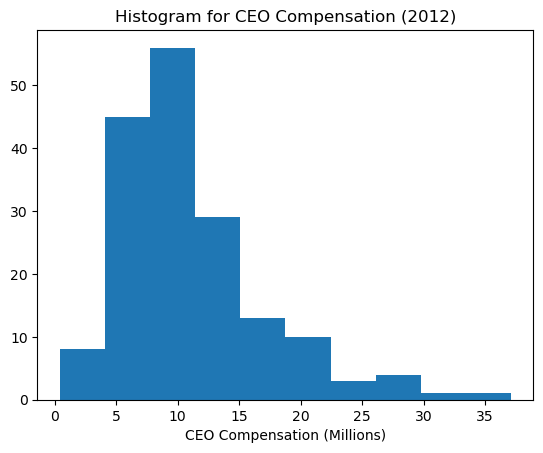

In [141]:
#Histogram of Compensation (Millions)
plt.hist(df['Compensation ($millions)'])
plt.title('Histogram for CEO Compensation (2012)')
plt.xlabel("CEO Compensation (Millions)")
plt.show()

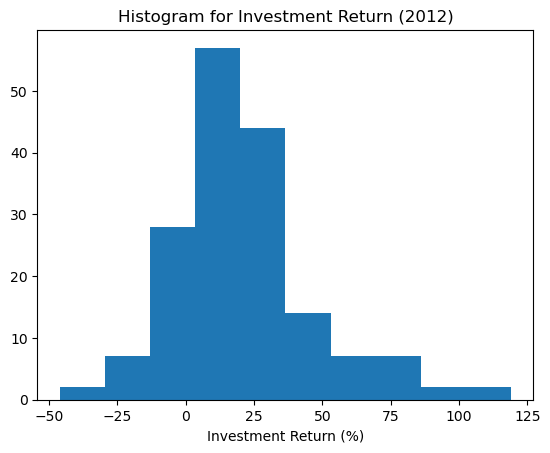

In [148]:
#Histogram of Investment Return (%)
plt.hist(df['Return in 2012 (%)'])
plt.title('Histogram for Investment Return (2012)')
plt.xlabel("Investment Return (%)")
plt.show()

In [ ]:
#Used ChatGPT for definition of a percentage polygon. Code was provided for a general example and adjusted for 
#this specific use case. The following cells are for the percentage polygons for compensation and investment return.

In [69]:
#CEO Compensation (Millions) percentage polygon creation
comp_bins = [0,7,14,21,28,35,42]
df['Comp_Bins'] = pd.cut(df['Compensation ($millions)'], bins=comp_bins)

comp_frequency = df['Comp_Bins'].value_counts().sort_index()
comp_percentage = (comp_frequency / comp_frequency.sum()) * 100

In [71]:
print(comp_frequency)

Comp_Bins
(0, 7]      43
(7, 14]     93
(14, 21]    22
(21, 28]     7
(28, 35]     4
(35, 42]     1
Name: count, dtype: int64


In [73]:
print(comp_percentage)

Comp_Bins
(0, 7]      25.294118
(7, 14]     54.705882
(14, 21]    12.941176
(21, 28]     4.117647
(28, 35]     2.352941
(35, 42]     0.588235
Name: count, dtype: float64


In [75]:
comp_bin_mid = [interval.mid for interval in comp_frequency.index]
print(comp_bin_mid)

[3.5, 10.5, 17.5, 24.5, 31.5, 38.5]


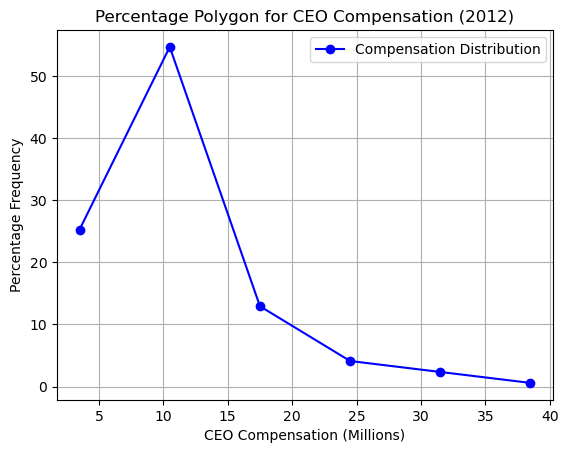

In [139]:
plt.plot(comp_bin_mid, comp_percentage, marker='o', linestyle='-', color='blue', label='Compensation Distribution')

plt.title('Percentage Polygon for CEO Compensation (2012)')
plt.xlabel('CEO Compensation (Millions)')
plt.ylabel('Percentage Frequency')
plt.grid(True)
plt.legend()
plt.show()

In [59]:
#Investment Return (%) percentage polygon creation
return_bins = [-56,-28,0,28,56,84,112,140]
df['Return_Bins'] = pd.cut(df['Return in 2012 (%)'], bins=return_bins)

ret_frequency = df['Return_Bins'].value_counts().sort_index()
ret_percentage = (ret_frequency / ret_frequency.sum()) * 100

In [61]:
print(ret_frequency)

Return_Bins
(-56, -28]     4
(-28, 0]      26
(0, 28]       94
(28, 56]      28
(56, 84]      14
(84, 112]      3
(112, 140]     1
Name: count, dtype: int64


In [63]:
print(ret_percentage)

Return_Bins
(-56, -28]     2.352941
(-28, 0]      15.294118
(0, 28]       55.294118
(28, 56]      16.470588
(56, 84]       8.235294
(84, 112]      1.764706
(112, 140]     0.588235
Name: count, dtype: float64


In [65]:
ret_bin_mid = [interval.mid for interval in ret_frequency.index]
print(ret_bin_mid)

[-42.0, -14.0, 14.0, 42.0, 70.0, 98.0, 126.0]


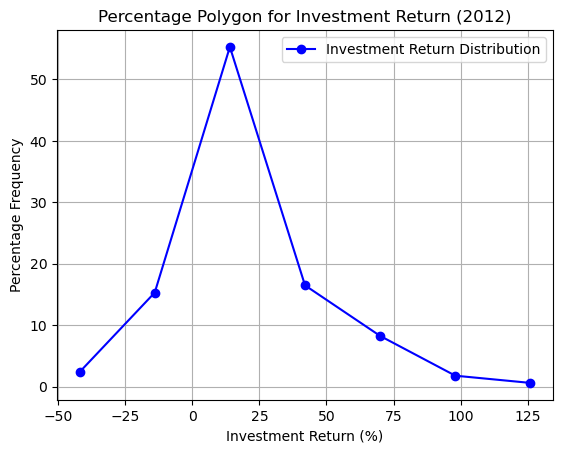

In [146]:
plt.plot(ret_bin_mid, ret_percentage, marker='o', linestyle='-', color='blue', label='Investment Return Distribution')

plt.title('Percentage Polygon for Investment Return (2012)')
plt.xlabel('Investment Return (%)')
plt.ylabel('Percentage Frequency')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Used ChatGPT for definition of a cumulative percentage polygon (ogive). Code was provided for a general example and adjusted for 
#this specific use case. The following cells are for the cumulative percentage polygons (ogives) for compensation and investment return.
#Used similar bins and labels as the percentage polygons for comparison.

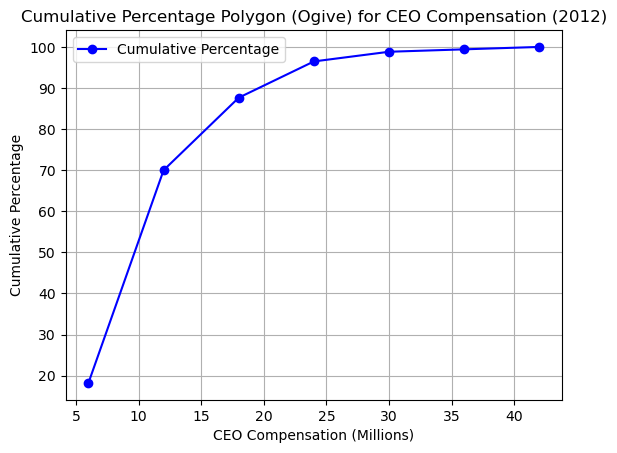

In [137]:
#CEO Compensation (Millions) cumulative percentage polygon (ogive) creation
ogive_comp_bins = [0, 6, 12, 18, 24, 30, 36, 42]
ogive_comp_labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42']

df['Compensation_Ogive_Comp_Bins'] = pd.cut(df['Compensation ($millions)'], bins=ogive_comp_bins, labels=ogive_comp_labels, include_lowest=True)

ogive_comp_frequency = df['Compensation_Ogive_Comp_Bins'].value_counts().sort_index()
cumulative_ogive_comp_frequency = ogive_comp_frequency.cumsum()

total_ogive_comp_frequency = ogive_comp_frequency.sum()
cumulative_ogive_comp_percentage = (cumulative_ogive_comp_frequency / total_ogive_comp_frequency) * 100

ogive_comp_upper_boundaries = ogive_comp_bins[1:]

plt.plot(ogive_comp_upper_boundaries, cumulative_ogive_comp_percentage, marker='o', linestyle='-', color='blue', label='Cumulative Percentage')

plt.title('Cumulative Percentage Polygon (Ogive) for CEO Compensation (2012)')
plt.xlabel('CEO Compensation (Millions)')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.legend()
plt.show()


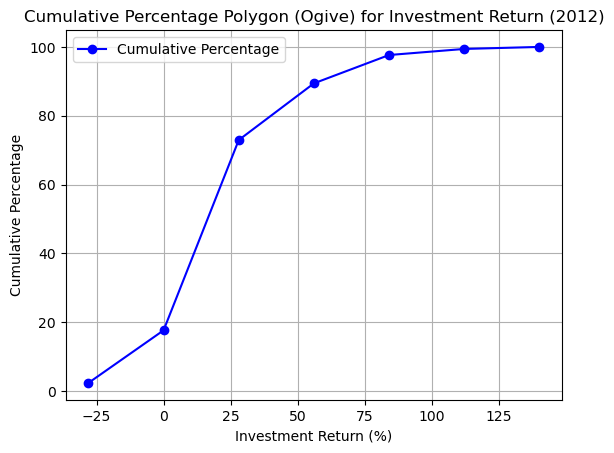

In [144]:
#Investment Return (%) cumulative percentage polygon (ogive) creation
ogive_return_bins = [-56,-28,0,28,56,84,112,140]
ogive_return_labels = ['-56 - -28', '-28-0', '0-28', '28-56', '56-84', '84-112', '112-140']

df['Return_Ogive_Bins'] = pd.cut(df['Return in 2012 (%)'], bins=ogive_return_bins, labels=ogive_return_labels, include_lowest=True)

ogive_return_frequency = df['Return_Ogive_Bins'].value_counts().sort_index()
cumulative_ogive_return_frequency = ogive_return_frequency.cumsum()

total_ogive_return_frequency = ogive_return_frequency.sum()
cumulative_ogive_return_percentage = (cumulative_ogive_return_frequency / total_ogive_return_frequency) * 100

ogive_return_upper_boundaries = ogive_return_bins[1:]

plt.plot(ogive_return_upper_boundaries, cumulative_ogive_return_percentage, marker='o', linestyle='-', color='blue', label='Cumulative Percentage')

plt.title('Cumulative Percentage Polygon (Ogive) for Investment Return (2012)')
plt.xlabel('Investment Return (%)')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.legend()
plt.show()


### CEO Compensation conclusions

#### In a review of the CEO compensation and investment return percentage data a few trends are presented. The CEO Compensation has slight right-skew but is generally normally distributed. The investment return percentages are even more normally distributed. The majority of CEOs make less than $14M with a sharp decline after reaching that amount. Over 75% of companies report a CEO with compensation under this amount. The investment return percentage has a similar peak under 25% with over 70% of companies reporting an investment return percentage under this amount. These trends are more clearly outlined in the cumulative percentage polygon charts. The climb is very steep and reaches a near-max percentage within the first third of the graph for CEO compensation and within the first half of the graph for investment return percentage. 

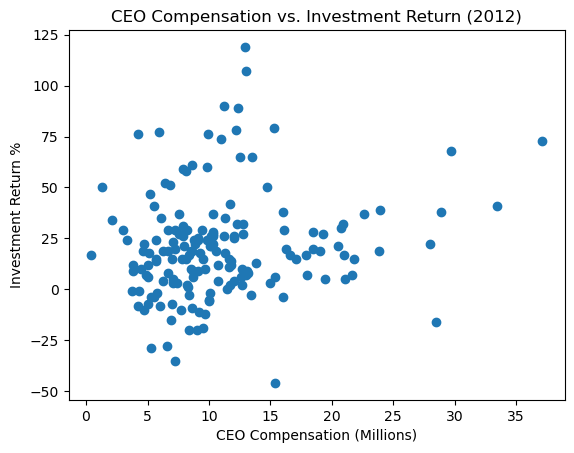

In [135]:
#CEO Compensation (Millions) vs Investment Return (%) scatterplot
plt.scatter(df['Compensation ($millions)'], df['Return in 2012 (%)'])
plt.title('CEO Compensation vs. Investment Return (2012)')
plt.xlabel('CEO Compensation (Millions)')
plt.ylabel('Investment Return %')
plt.show()

### Relationship between CEO compensation and investment return percentage in 2012

#### The scatterplot solidifies the prior conclusions that the majority of CEO compensation is under \\$14M and most investment return percentages are under 25%. There is a small trend that could be investigated for CEO compensation around \\$15M where the investment return percentage has an increase. There may be other variables contributing to these outliers. There is a small population of outliers in the CEO compensation above \\$25M that all have an investment return percentage above 25%. This too could be attributed to additional variables not included in the given data set.